# Credit Risk for Loan Applicants

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgb

In [23]:
df=pd.read_csv("german_credit_data.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [38]:
1000-606

394

In [25]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [26]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-36-48dbd59cde2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')


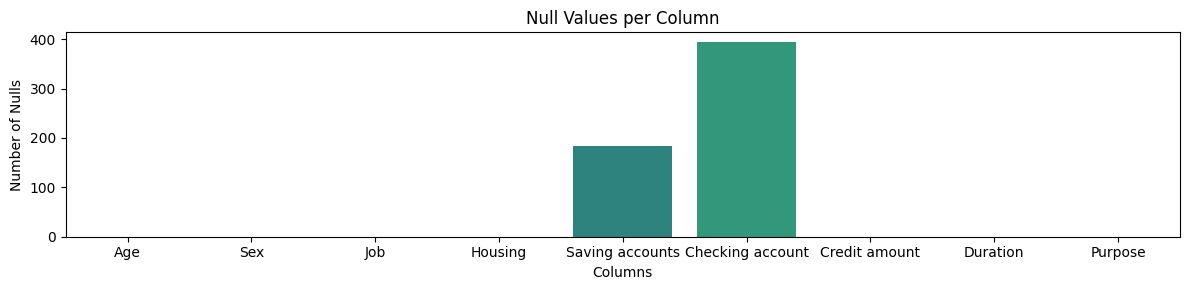

In [36]:
null_counts = df.isnull().sum()
plt.figure(figsize=(12,3 ))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Null Values per Column')
plt.ylabel('Number of Nulls')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [39]:
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

<ipython-input-39-4e1080b0fdb3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-39-4e1080b0fdb3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Text(0.5, 1.0, 'Distribution of Age')

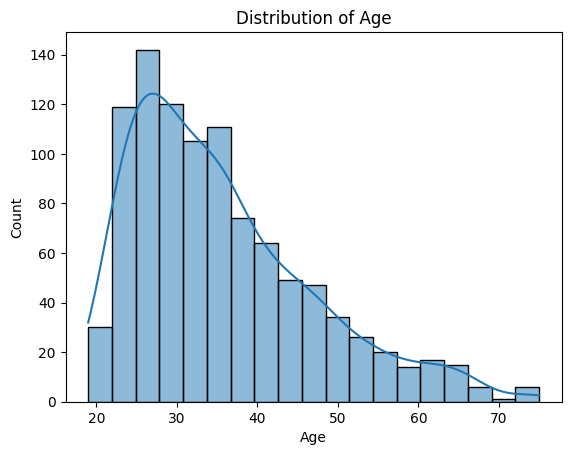

In [41]:
col="Age"
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')

Text(0.5, 1.0, 'Distribution of Duration')

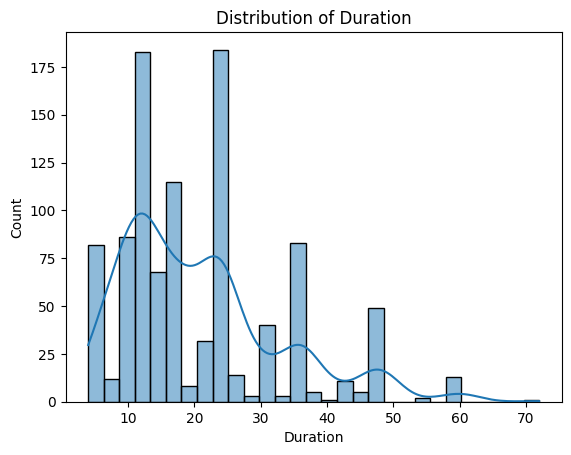

In [9]:
col="Duration"
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')

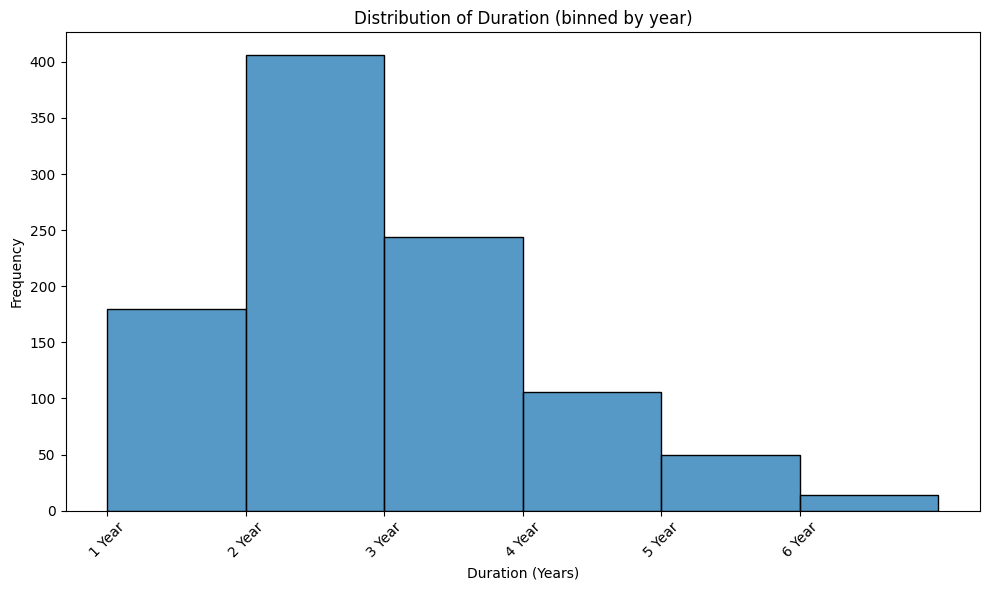

In [44]:
col = "Duration"

bin_edges = range(0, df[col].max() + 12, 12)

plt.figure(figsize=(10, 6))
sns.histplot(df[col], bins=bin_edges, kde=False)

tick_positions = list(bin_edges)[:-1]
year_labels    = [f'{i+1} Year' for i in range(len(tick_positions))]

plt.xticks(tick_positions, year_labels, rotation=45)
plt.title(f'Distribution of {col} (binned by year)')
plt.xlabel('Duration (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Count Plot of Sex')

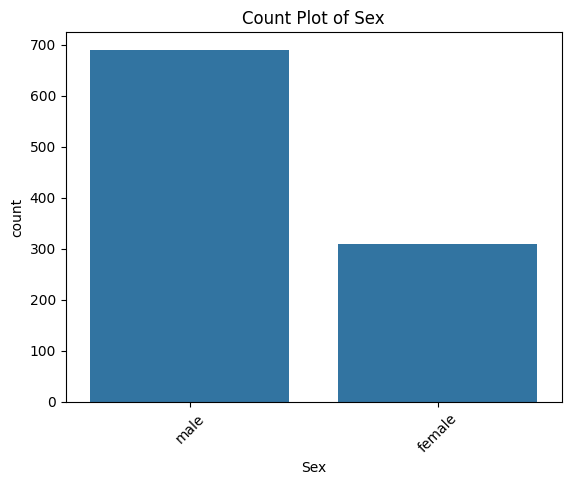

In [11]:
col="Sex"
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'Count Plot of {col}')

Text(0.5, 1.0, 'Count Plot of Housing')

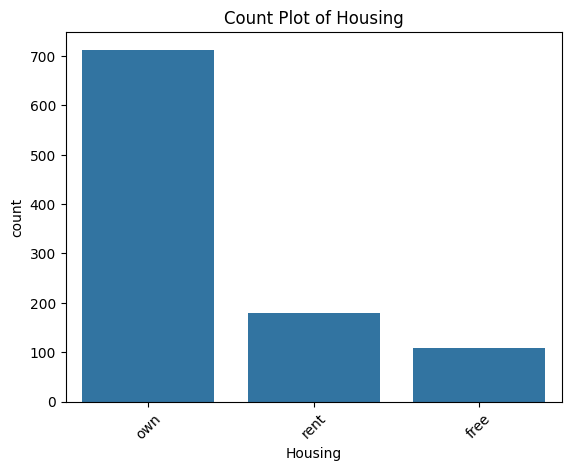

In [12]:
col="Housing"
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'Count Plot of {col}')

Text(0.5, 1.0, 'Count Plot of Saving accounts')

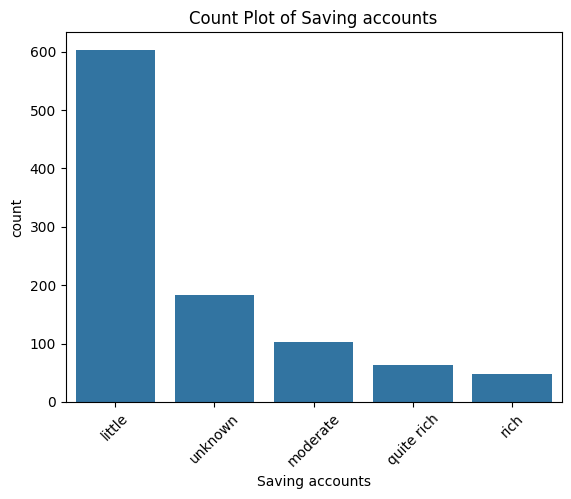

In [13]:
col="Saving accounts"
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'Count Plot of {col}')

Text(0.5, 1.0, 'Count Plot of Checking account')

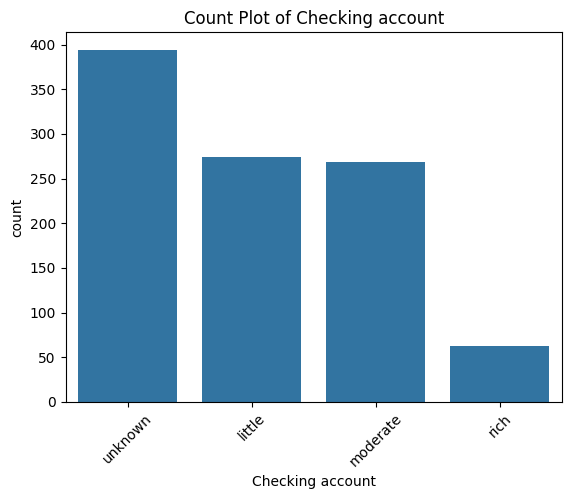

In [14]:
col="Checking account"
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'Count Plot of {col}')

Text(0.5, 1.0, 'Count Plot of Purpose')

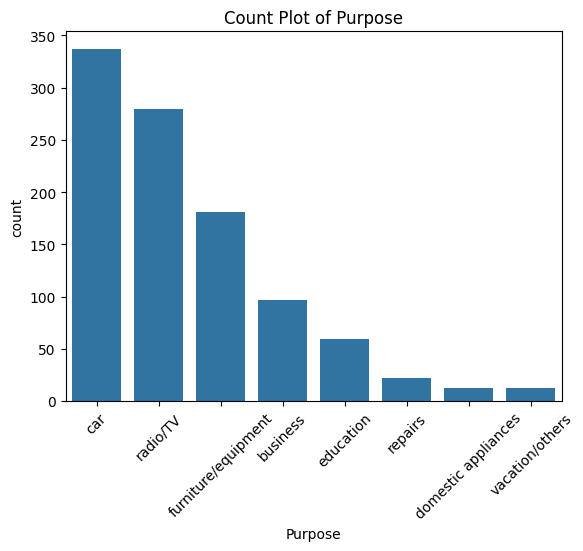

In [15]:
col="Purpose"
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
plt.title(f'Count Plot of {col}')

Text(0.5, 1.0, 'Correlation Matrix')

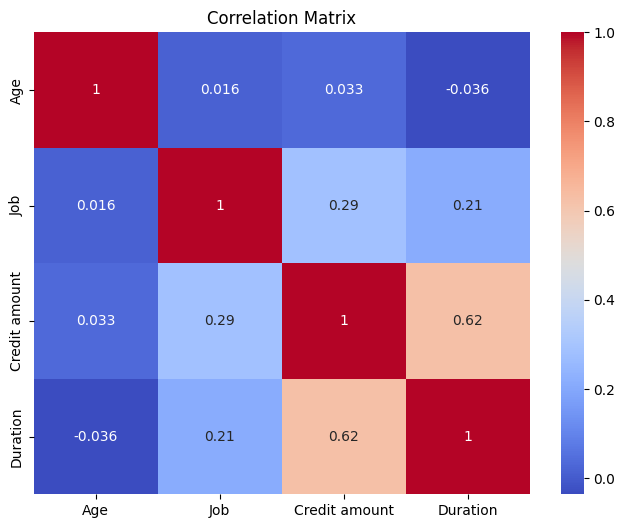

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Credit Amount by Sex')

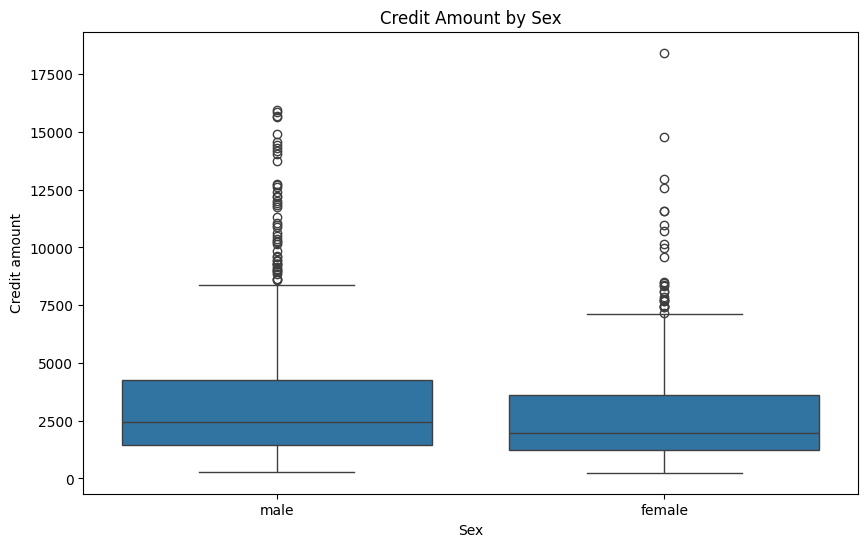

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Credit amount', data=df)
plt.title("Credit Amount by Sex")

Text(0.5, 1.0, 'Credit Amount by Housing Type')

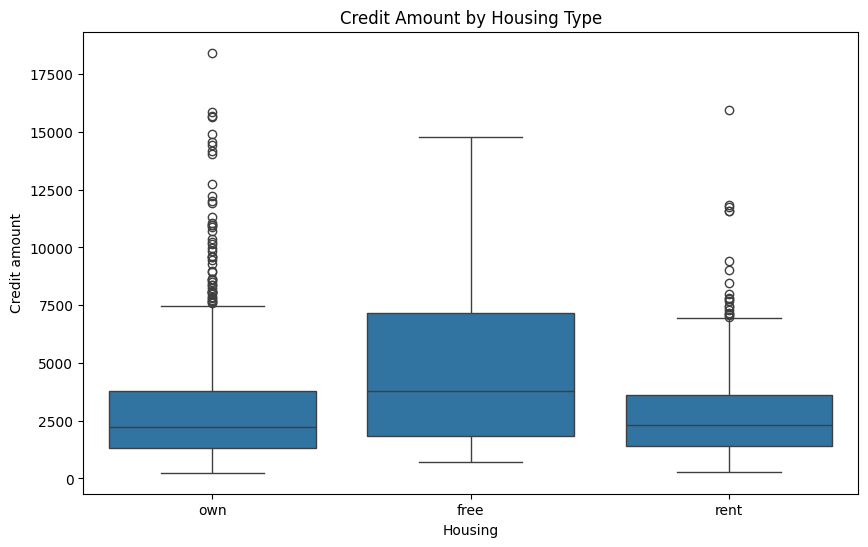

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Housing', y='Credit amount', data=df)
plt.title("Credit Amount by Housing Type")

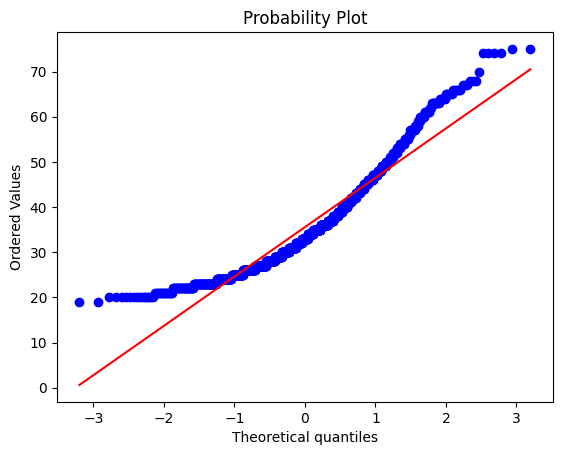

In [19]:
stats.probplot(df.Age, dist = "norm", plot = pylab)
plt.show()

<Axes: xlabel='Age'>

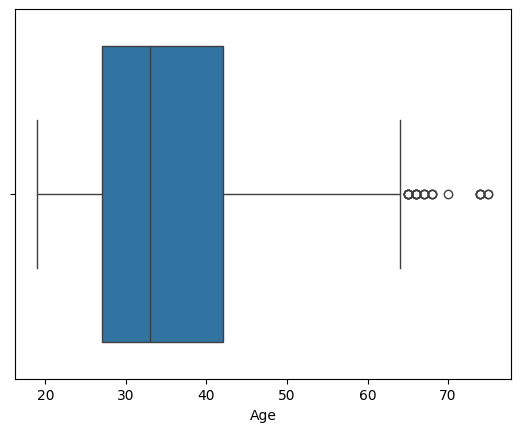

In [20]:
sns.boxplot(x=df.Age)

<Axes: xlabel='Credit amount', ylabel='Count'>

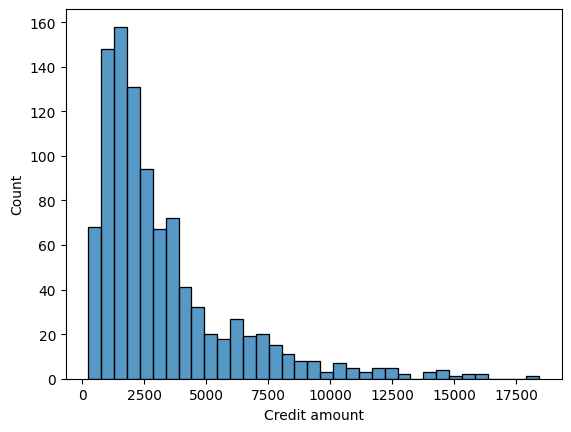

In [21]:
sns.histplot(df['Credit amount'])

In [45]:
median_amt = df['Credit amount'].median()

In [46]:
df['Credit amount'] = np.where(
    df['Credit amount'] < median_amt,
    'good',
    'bad'
)

In [47]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,good,6,radio/TV
1,22,female,2,own,little,moderate,bad,48,radio/TV
2,49,male,1,own,little,unknown,good,12,education
3,45,male,2,free,little,little,bad,42,furniture/equipment
4,53,male,2,free,little,little,bad,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,good,12,furniture/equipment
996,40,male,3,own,little,little,bad,30,car
997,38,male,2,own,little,unknown,good,12,radio/TV
998,23,male,2,free,little,little,good,45,radio/TV


<Axes: xlabel='Credit amount', ylabel='Count'>

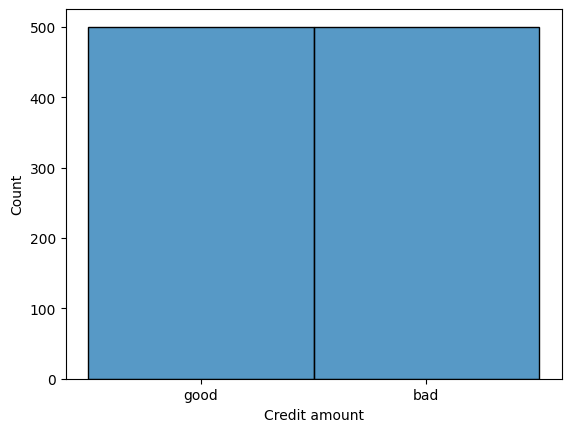

In [48]:
sns.histplot(df['Credit amount'])

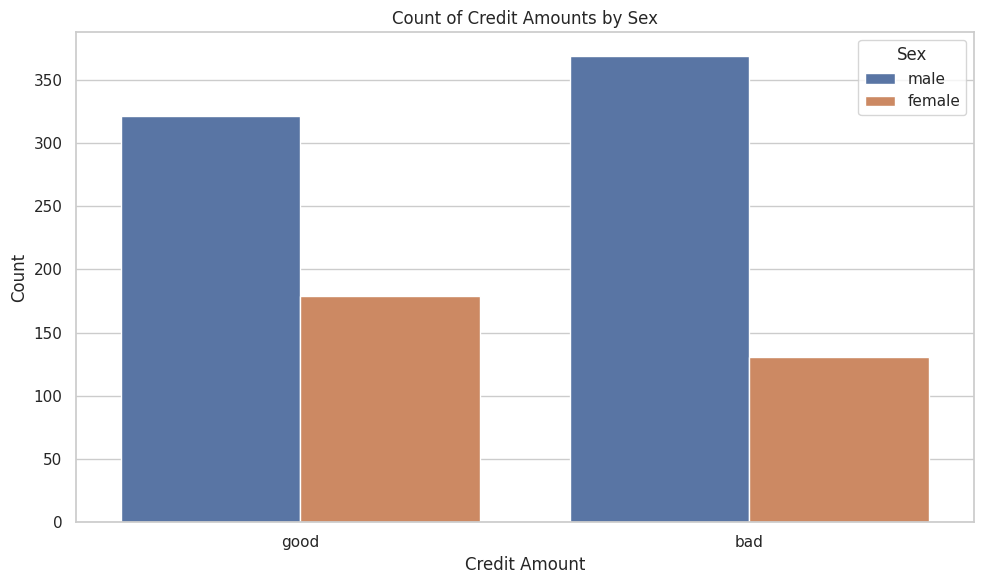

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit amount', hue='Sex')

plt.title('Count of Credit Amounts by Sex')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


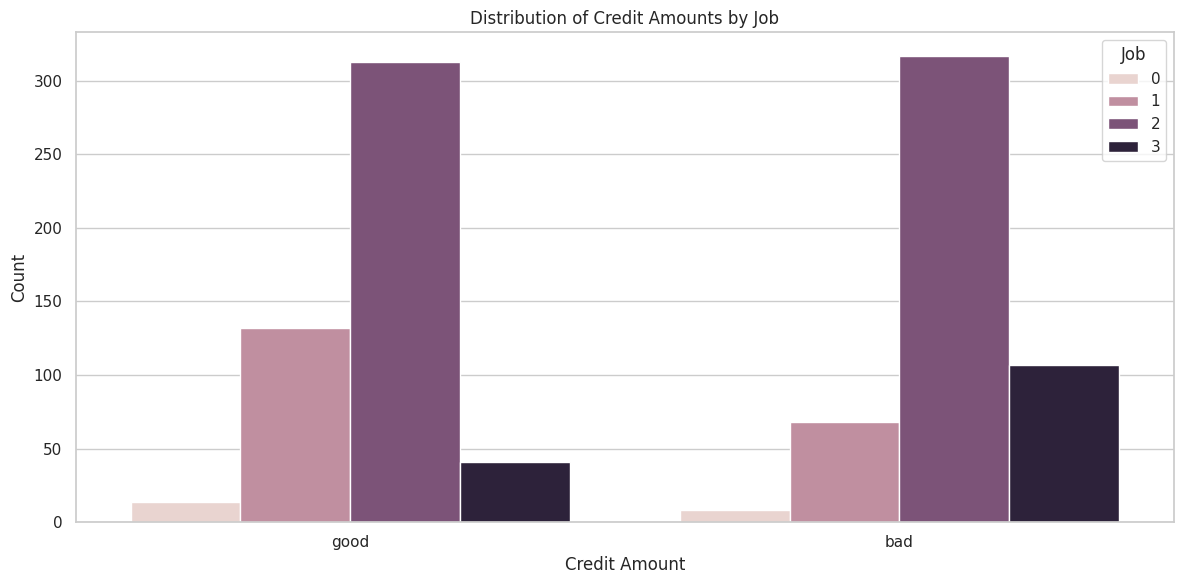

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Credit amount', hue='Job')

plt.title('Distribution of Credit Amounts by Job')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.legend(title='Job')
plt.tight_layout()
plt.show()

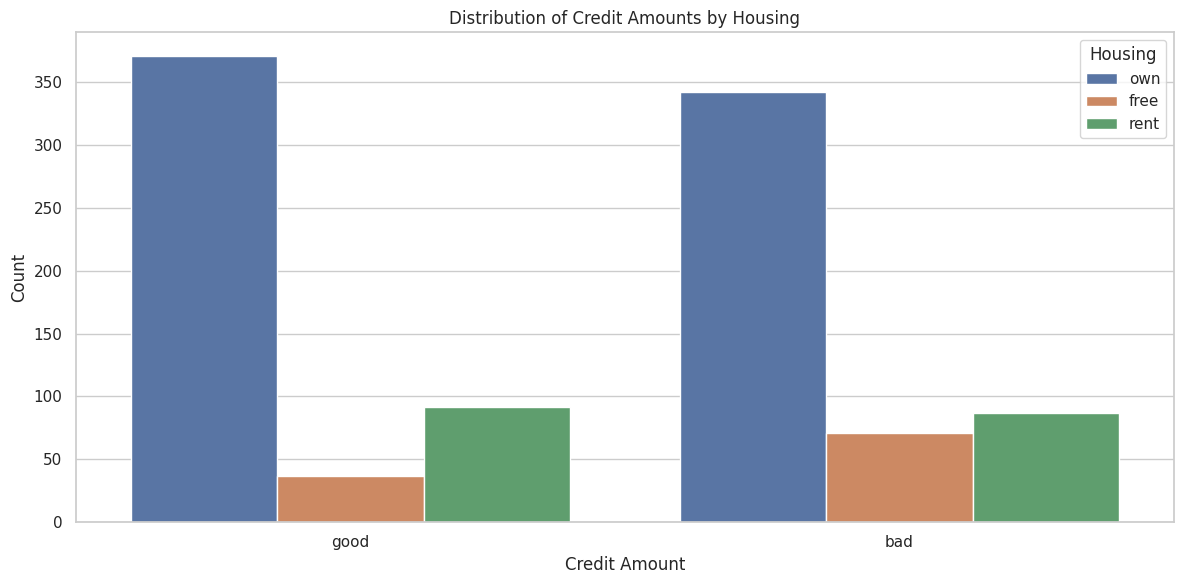

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Credit amount', hue='Housing')

plt.title('Distribution of Credit Amounts by Housing')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.legend(title='Housing')
plt.tight_layout()
plt.show()

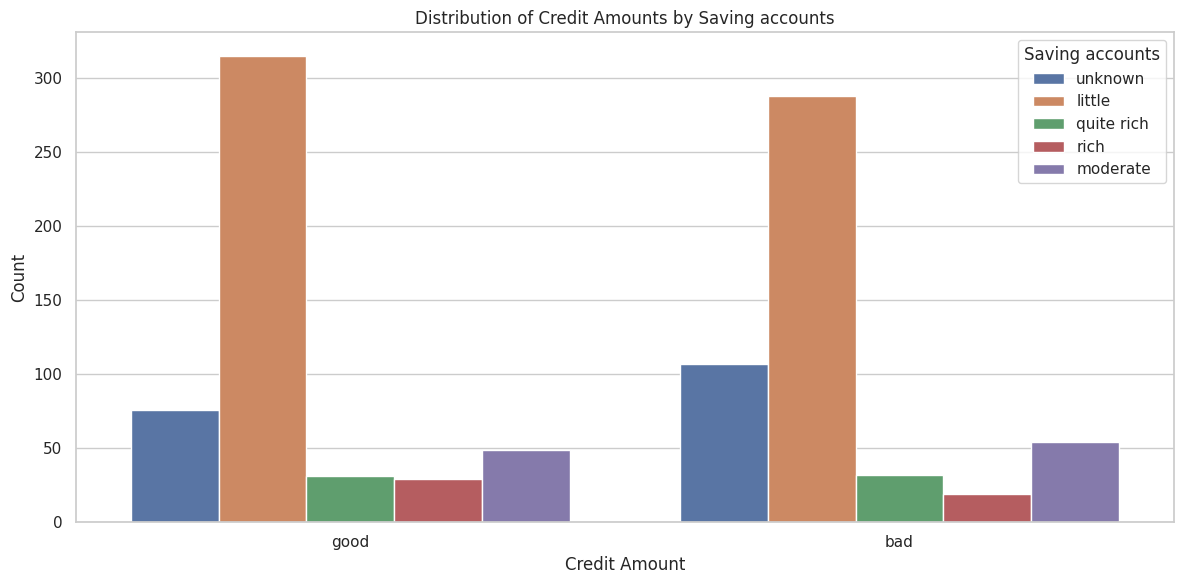

In [53]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Credit amount', hue='Saving accounts')

plt.title('Distribution of Credit Amounts by Saving accounts')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.legend(title='Saving accounts')
plt.tight_layout()
plt.show()

In [55]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,good,6,radio/TV
1,22,female,2,own,little,moderate,bad,48,radio/TV
2,49,male,1,own,little,unknown,good,12,education
3,45,male,2,free,little,little,bad,42,furniture/equipment
4,53,male,2,free,little,little,bad,24,car


In [56]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [57]:
def preprocess_column(df, column):
    unique_vals = df[column].unique()
    for val in unique_vals:
        df[f'{column}_{val}'] = (df[column] == val).astype(int)
    df = df.drop(columns=[column])
    return df

In [58]:
df = preprocess_column(df, 'Saving accounts')
df = preprocess_column(df, 'Checking account')
df = preprocess_column(df, 'Housing')
df = preprocess_column(df, 'Purpose')

In [62]:
df['Credit amount'] = df['Credit amount'].map({'good': 1, 'bad': 0})

In [63]:
df

,Age,Sex,Job,Credit amount,Duration,Saving accounts_unknown,Saving accounts_little,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_moderate,...,Housing_free,Housing_rent,Purpose_radio/TV,Purpose_education,Purpose_furniture/equipment,Purpose_car,Purpose_business,Purpose_domestic appliances,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,6,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,22,0,2,0,48,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,49,1,1,1,12,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,45,1,2,0,42,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,53,1,2,0,24,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,40,1,3,0,30,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,38,1,2,1,12,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
998,23,1,2,1,45,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Sex                          1000 non-null   int64
 2   Job                          1000 non-null   int64
 3   Credit amount                1000 non-null   int64
 4   Duration                     1000 non-null   int64
 5   Saving accounts_unknown      1000 non-null   int64
 6   Saving accounts_little       1000 non-null   int64
 7   Saving accounts_quite rich   1000 non-null   int64
 8   Saving accounts_rich         1000 non-null   int64
 9   Saving accounts_moderate     1000 non-null   int64
 10  Checking account_little      1000 non-null   int64
 11  Checking account_moderate    1000 non-null   int64
 12  Checking account_unknown     1000 non-null   int64
 13  Checking account_rich        1000 non-null   int6

In [92]:
X = df.drop(columns=['Credit amount'])
y = df['Credit amount']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 394, number of negative: 406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492500 -> initscore=-0.030002
[LightGBM] [Info] Start training from score -0.030002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

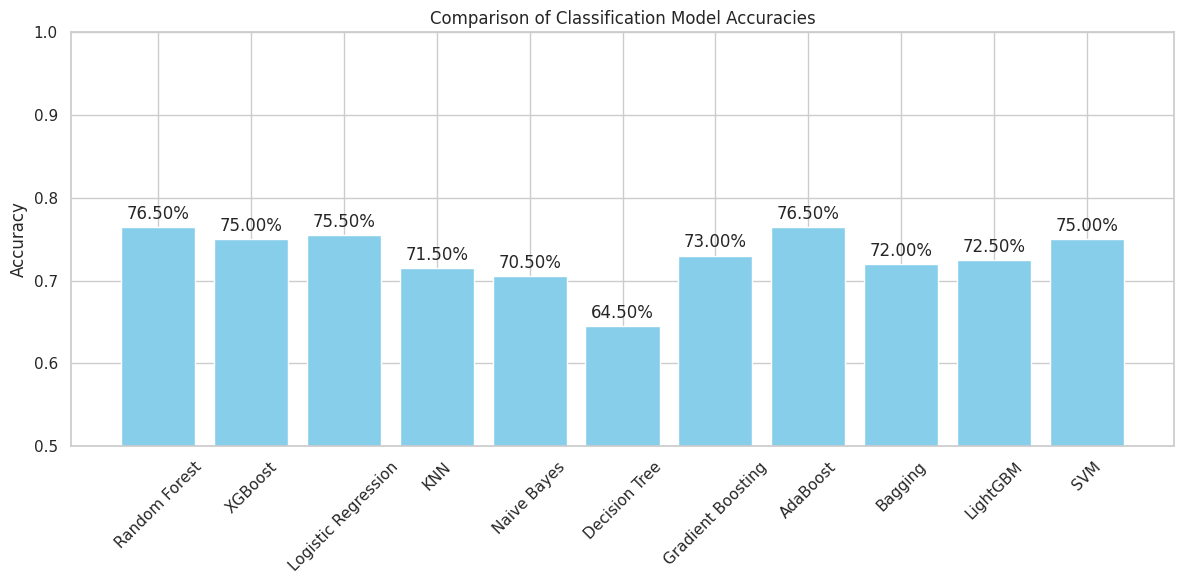

In [111]:
model_names = []
accuracies = []

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_names.append("Random Forest")
accuracies.append(accuracy_score(y_test, y_pred))

model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
model_names.append("XGBoost")
accuracies.append(accuracy_score(y_test, y_pred))

log_reg = LogisticRegression(random_state=42)
param_grid = {
    'C': [1],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
model_names.append("Logistic Regression")
accuracies.append(accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
model_names.append("KNN")
accuracies.append(accuracy_score(y_test, y_pred))

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
model_names.append("Naive Bayes")
accuracies.append(accuracy_score(y_test, y_pred))

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
model_names.append("Decision Tree")
accuracies.append(accuracy_score(y_test, y_pred))

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
model_names.append("Gradient Boosting")
accuracies.append(accuracy_score(y_test, y_pred))

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
model_names.append("AdaBoost")
accuracies.append(accuracy_score(y_test, y_pred))

bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
model_names.append("Bagging")
accuracies.append(accuracy_score(y_test, y_pred))

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
model_names.append("LightGBM")
accuracies.append(accuracy_score(y_test, y_pred))

svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
model_names.append("SVM")
accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Model Accuracies")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center')
plt.tight_layout()
plt.show()

In [112]:
import joblib

joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']